# Applied Machine Learning 2
## Course project          
                                                 Author: Diego Rodriguez
## Simple decision trees

Can you do better than the k-NN baseline with decision trees?

- What accuracy can you achieve with a depth of 3?
- Plot the corresponding tree with graphviz
- Do you get better results if you reduce the number of dimensions with PCA first?

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load the npz file
base_dir = '/Users/rodriguezmod/Downloads/swissroads/'

with np.load(base_dir+'features.npz', allow_pickle=False) as npz_file: 
    # It's a dictionary-like object 
    print(list(npz_file.keys()))
    
    # Load the arrays    
    # Merging test and validation features data to use a cross-validation approach to model fitting.    
    X_tr = np.concatenate((npz_file['train_features'], npz_file['validation_features']))
    X_tr_pixels = np.concatenate((npz_file['train_pixels'], npz_file['validation_pixels']))
    y_tr = np.concatenate((npz_file['train_labels'], npz_file['validation_labels']))
    # Reduce to 1-dim
    y_tr = np.argmax(y_tr, axis=1)

    X_te = npz_file['test_features']
    X_te_pixels = npz_file['test_pixels']
    y_te = npz_file['test_labels']
    # Reduce to 1-dim
    y_te = np.argmax(y_te, axis=1)

['train_features', 'validation_features', 'test_features', 'train_labels', 'validation_labels', 'test_labels', 'train_pixels', 'validation_pixels', 'test_pixels']


## Depth of 3
What accuracy can you achieve with a depth of 3?

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create decision tree classifer object
dt_3_depth = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0, class_weight="balanced")

# Fitting on train set
dt_3_depth.fit(X_tr, y_tr)

# Evaluate on train set
accuracy_tr = dt_3_depth.score(X_tr, y_tr)

# Evaluate on test set
accuracy_te = dt_3_depth.score(X_te, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 75.9%
Test accuracy: 64.0%


## Plot tree
Plot the corresponding tree with graphviz

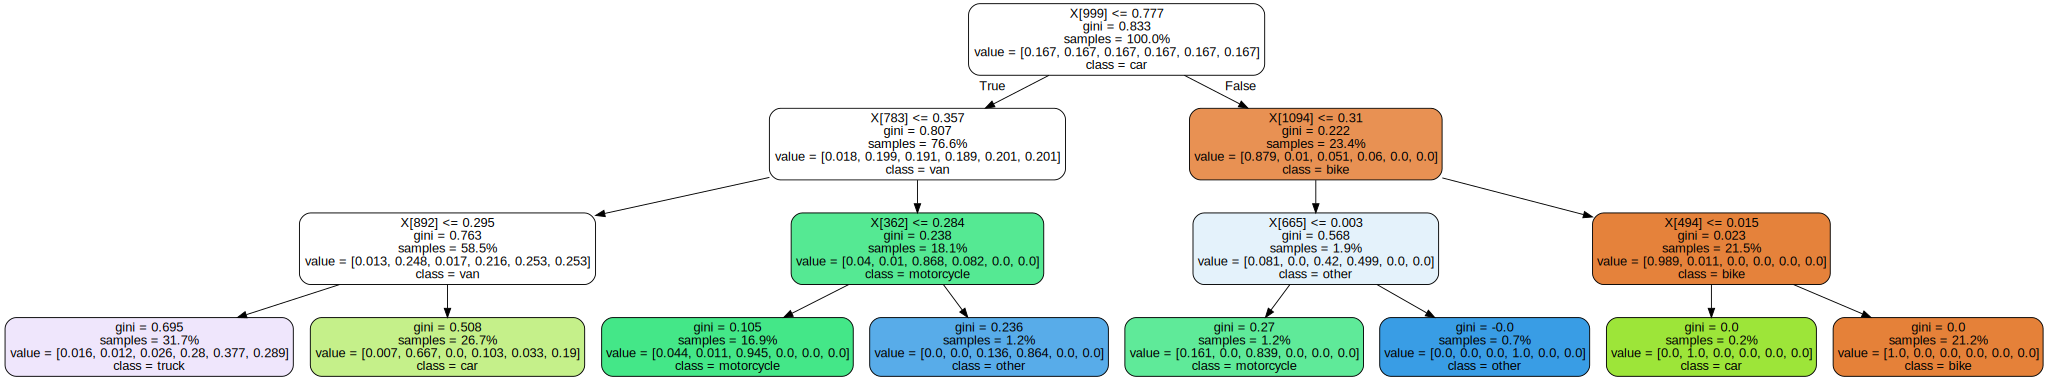

In [3]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree
dot_data = export_graphviz(
    dt_3_depth, out_file=None,
    class_names=["bike","car","motorcycle","other","truck","van"],
    filled=True, rounded=True, proportion=True   
)

# Display decision tree
graphviz.Source(dot_data)

## PCA as preprocessing
Do you get better results if you reduce the number of dimensions with PCA first? Yes, it is.

In [4]:
from sklearn.decomposition import PCA

# PCA to reduce number of dimensions
pca = PCA(n_components=100, whiten=True)

# Fit and transform train data
X_tr_PCA = pca.fit_transform(X_tr)

# Transform test data
X_te_PCA = pca.transform(X_te)

In [5]:
# Create decision tree classifer object with PCA transform data
dt_3_depth_PCA = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0, class_weight="balanced")

# Fitting on train set
dt_3_depth_PCA.fit(X_tr_PCA, y_tr)

# Evaluate on train set
accuracy_tr = dt_3_depth_PCA.score(X_tr_PCA, y_tr)

# Evaluate on test set
accuracy_te = dt_3_depth_PCA.score(X_te_PCA, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 81.6%
Test accuracy: 76.0%


After fitting a decision tree classifier model with a depth of **3**, an accuracy value of **64.0%** is obtained, which is not really a very good value. But after reduce the number of dimensions with PCA, then performing a cross-validation fit and tune to decision tree classifier, with an even better value of accuracy of **76.0%** is achieved.

Can you do better than the k-NN baseline with decision trees? No, I can not, the k-NN baseline model developed, obtain better results than those obtained with decision tree classifier models.